# Principal Component Analysis

When you have a very wide dataset, you can reduce its dimensionality using principal component analysis (PCA). PCA relies on the concepts of linear transformations and singular value decomposition (SVD) in linear algebra.  
Luckily, scikit-learn provides a package that we can use to perform PCA instead of worrying about the linear algebra. You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [1]:
# Load packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Load data from the csv file
df = pd.read_csv("iris.csv", index_col=0)
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# Define the features for which you want the principal components
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df.loc[:, features].values

# Get the output
y = df.loc[:,['target']].values

In [4]:
# The number of principal components we want
# This will become the dimension of our (input) dataset
N_COMPONENTS=2

# Import the PCA package from scikit-learn
from sklearn.decomposition import PCA

# Set up and execute PCA
pca = PCA(n_components=N_COMPONENTS)
principal_comps = pca.fit_transform(X)

# Convert into a new dataframe
principal_df = pd.DataFrame(data = principal_comps, columns = ['pc1', 'pc2'])
principal_df['target'] = y

In [5]:
principal_df.head()

,pc1,pc2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


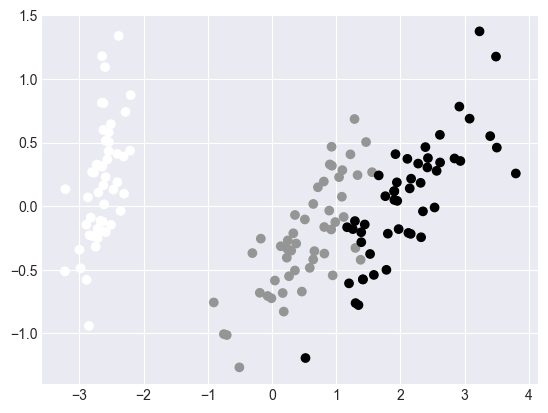

In [6]:
# Change plot style
plt.style.use('seaborn-darkgrid')

# Plot the dataset with the principal components
fig=plt.scatter(
    x=principal_df['pc1'], 
    y=principal_df['pc2'], 
    c=principal_df['target']
)

As you can see, the dimension of the dataset is reduced while the different classes are still separable.